### Look at images and develop pipeline to read in and process images and masks
F. Burkholder 25 Sept. 2017

In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ids = np.loadtxt('ids_train.txt', dtype='string_')

In [3]:
# change byte literals to strings
def to_str(x):
    return x.decode('UTF-8')

to_str = np.vectorize(to_str)

In [4]:
car_ids = to_str(ids)

In [5]:
car_ids[:10]

array(['78f63d808555', 'd46244bc42ed', '3c6acfceb552', '78bfb9c780db',
       '82f72273d23e', '6131a03dd028', '5bcde75955bb', 'd9b2ded58b72',
       '08a646be6b30', '11f3dc041cfb'], 
      dtype='<U12')

In [6]:
img_folder = 'train/'
mask_folder = 'train_masks/'
views = ['_0'+ str(num) for num in range(1,10)]
views.extend(['_' + str(num) for num in range(10, 17)])
img_ext = '.jpg'
mask_ext = '_mask.gif'

In [7]:
ci = 10
car = car_ids[ci]
car_imgs = [img_folder + car + view + img_ext for view in views]
mask_imgs = [mask_folder + car + view + mask_ext for view in views]
for img, mask in zip(car_imgs, mask_imgs):
    print(img, mask)

train/0ee135a3cccc_01.jpg train_masks/0ee135a3cccc_01_mask.gif
train/0ee135a3cccc_02.jpg train_masks/0ee135a3cccc_02_mask.gif
train/0ee135a3cccc_03.jpg train_masks/0ee135a3cccc_03_mask.gif
train/0ee135a3cccc_04.jpg train_masks/0ee135a3cccc_04_mask.gif
train/0ee135a3cccc_05.jpg train_masks/0ee135a3cccc_05_mask.gif
train/0ee135a3cccc_06.jpg train_masks/0ee135a3cccc_06_mask.gif
train/0ee135a3cccc_07.jpg train_masks/0ee135a3cccc_07_mask.gif
train/0ee135a3cccc_08.jpg train_masks/0ee135a3cccc_08_mask.gif
train/0ee135a3cccc_09.jpg train_masks/0ee135a3cccc_09_mask.gif
train/0ee135a3cccc_10.jpg train_masks/0ee135a3cccc_10_mask.gif
train/0ee135a3cccc_11.jpg train_masks/0ee135a3cccc_11_mask.gif
train/0ee135a3cccc_12.jpg train_masks/0ee135a3cccc_12_mask.gif
train/0ee135a3cccc_13.jpg train_masks/0ee135a3cccc_13_mask.gif
train/0ee135a3cccc_14.jpg train_masks/0ee135a3cccc_14_mask.gif
train/0ee135a3cccc_15.jpg train_masks/0ee135a3cccc_15_mask.gif
train/0ee135a3cccc_16.jpg train_masks/0ee135a3cccc_16_m

(1280, 1918, 3)


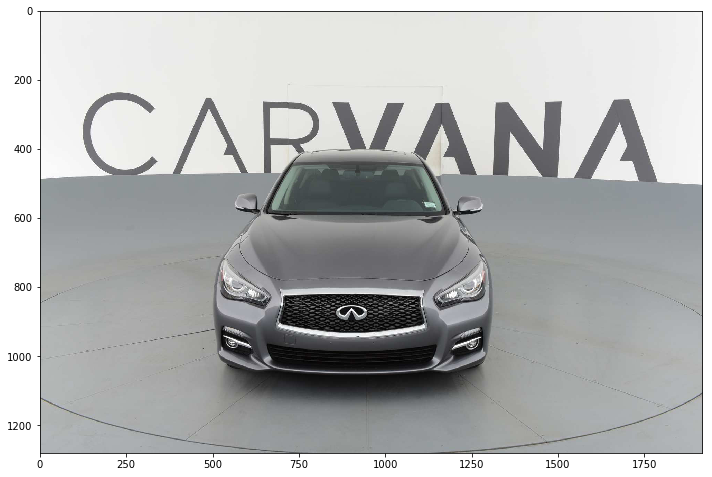

In [8]:
img_car = io.imread(car_imgs[0])
print(img_car.shape)
plt.figure(figsize=(10, 10))
io.imshow(img_car)
plt.savefig(car + '_img.png')

(1280, 1918)


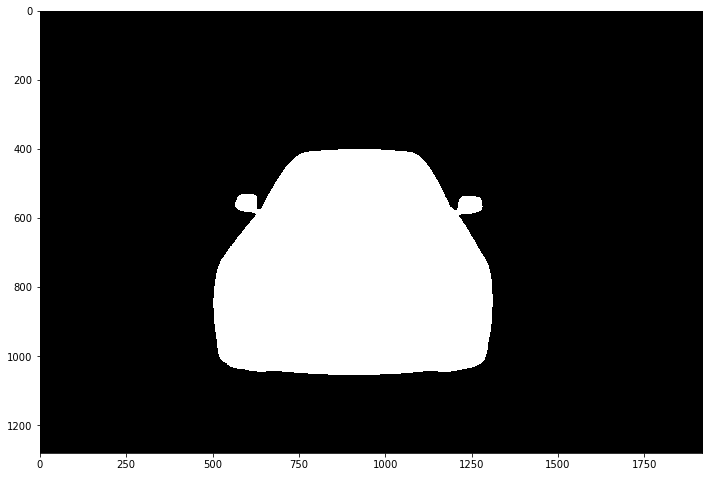

In [9]:
img_mask = io.imread(mask_imgs[0])
plt.figure(figsize=(10, 10))
print(img_mask.shape)
io.imshow(img_mask);
plt.savefig(car + '_mask.png')

In [10]:
img_mask_norm = img_mask / 255
img_mask_norm.max()

1.0

In [11]:
img_car_masked = np.copy(img_car)
for channel in range(3):
    img_car_masked[:,:,channel] = img_car[:,:,channel] * img_mask_norm    

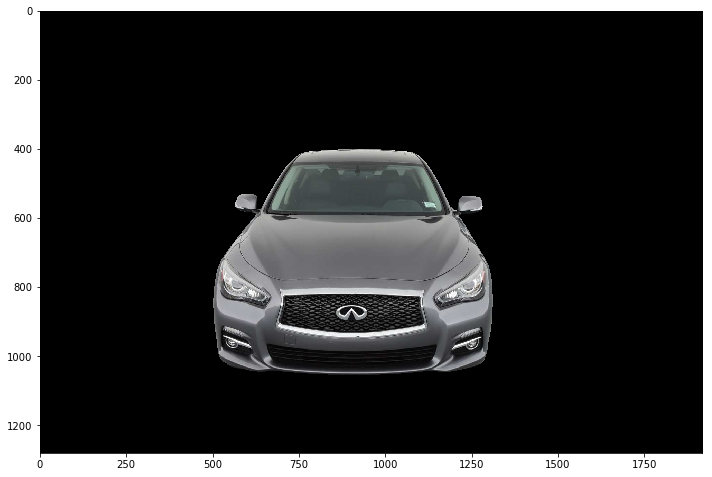

In [12]:
plt.figure(figsize=(10, 10))
io.imshow(img_car_masked);
plt.savefig(car + '_masked.png')

In [13]:
imgs_car = [io.imread(c) for c in car_imgs]

In [14]:
def show_16_views(imgs_of_car, car):
    lw = 5
    vline = np.zeros((imgs_of_car[0].shape[0], lw, 3), dtype = 'uint8')
    for i in [0, 4, 8, 12]:
        img = np.copy(imgs_of_car[i])
        for j in range(1,4):
            img = np.hstack((img, vline))
            img = np.hstack((img, imgs_of_car[i+j]))
        if i == 0:
            hline = np.zeros((lw, img.shape[1], 3), dtype = 'uint8')
            img_16 = np.vstack((img, hline))
        else:
            img_16 = np.vstack((img_16, np.vstack((img, hline))))
    plt.figure(figsize=(12, 12))
    io.imshow(img_16);
    plt.xticks([]);
    plt.yticks([])
    plt.savefig(car + '_16_views.png')

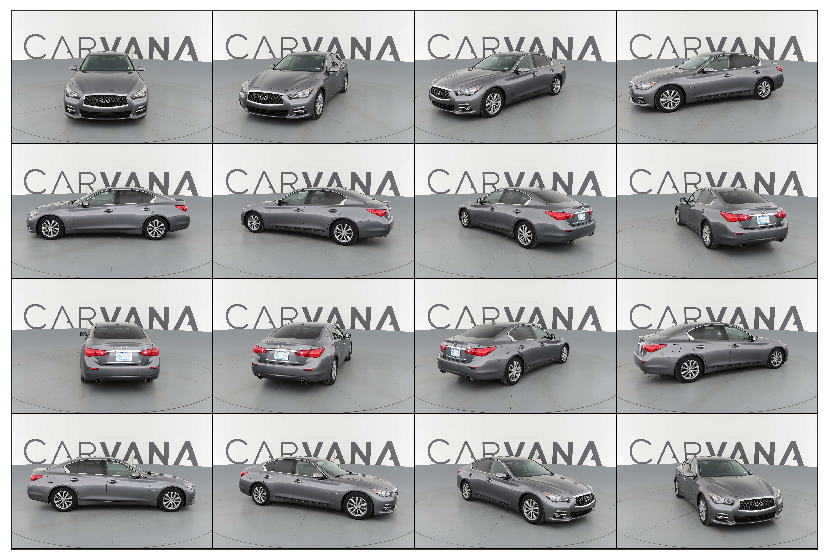

In [15]:
show_16_views(imgs_car, car)

In [ ]:
# this image shape didn't work with network
# crop images so that a 212 x 212 window can segment each image into 54 images - 6 rows and 9 columns
# image needs to be 1272 x 1908 instead of 1280 x 1918
# lose 4 rows off top and bottom of images, and 5 columns off left and right
#wc = 212
#rc = 4
#cc = 5
#imgs_cropped = [img[rc:1280-rc, cc:1918-cc, :] for img in imgs_car]
#imgs_cropped[0].shape

In [16]:
# crop images so that a 256 x 256 window can segment each image into 35 images - 5 rows and 7 columns
# image needs to be 1280 x 1792 instead of 1280 x 1918
# lose 0 rows off top and bottom of images, and 63 columns off left and right (126 total)
wc = 256
rc = 0
cc = 63
imgs_cropped = [img[rc:1280-rc, cc:1918-cc, :] for img in imgs_car]
imgs_cropped[0].shape

(1280, 1792, 3)

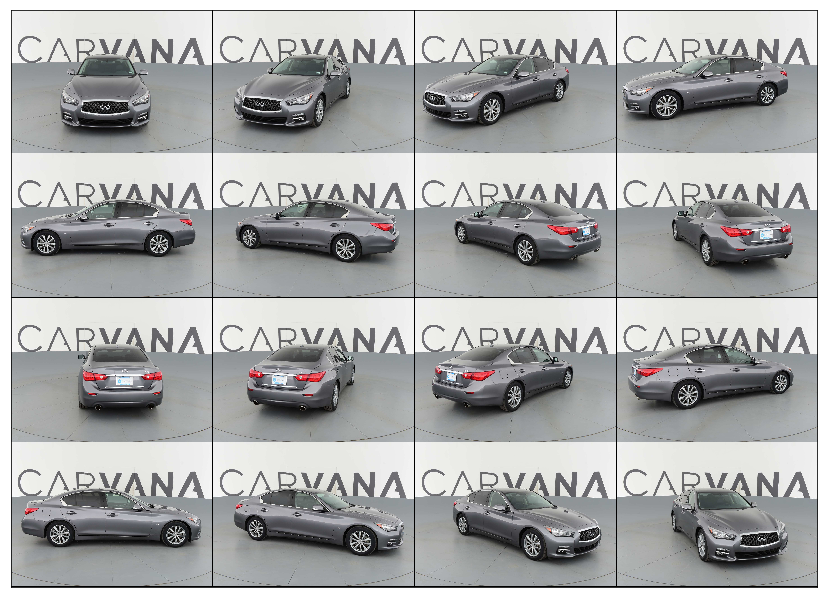

In [17]:
show_16_views(imgs_cropped, car + '_cropped')

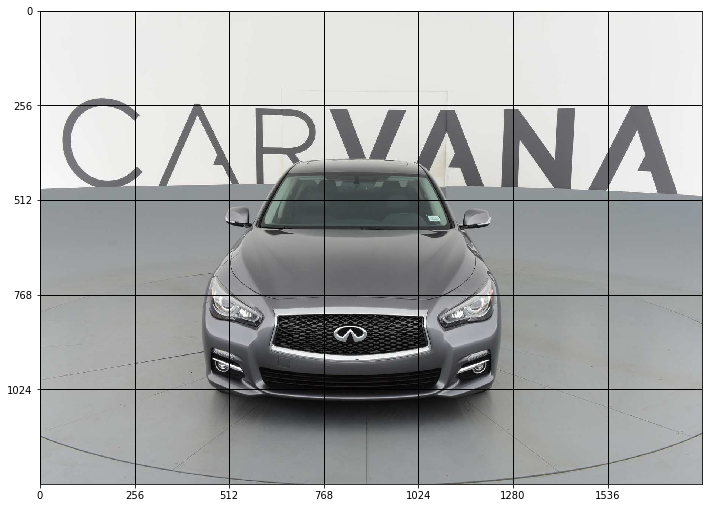

In [18]:
img = imgs_cropped[0]
plt.figure(figsize=(10, 10))
io.imshow(img)
plt.xticks(np.arange(0, img.shape[1], wc))
plt.yticks(np.arange(0, img.shape[0], wc))
plt.grid(color = 'k', linewidth = 1)
plt.savefig(car + '_front_cropped_img.png')

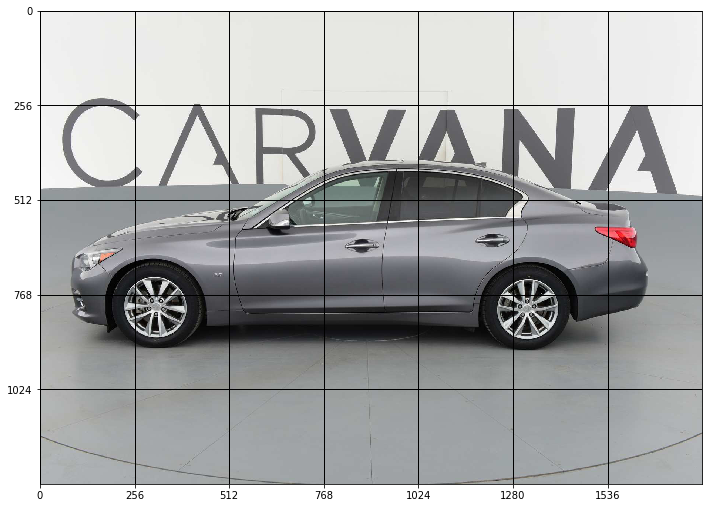

In [19]:
img = imgs_cropped[4]
plt.figure(figsize=(10, 10))
io.imshow(img)
plt.xticks(np.arange(0, img.shape[1], wc))
plt.yticks(np.arange(0, img.shape[0], wc))
plt.grid(color = 'k', linewidth = 1)
plt.savefig(car + '_side_cropped_img.png')

In [20]:
# crop the masks the same way
imgs_mask = [io.imread(m) for m in mask_imgs]
masks_cropped = [img[rc:1280-rc, cc:1918-cc] for img in imgs_mask]
masks_cropped[0].shape

(1280, 1792)

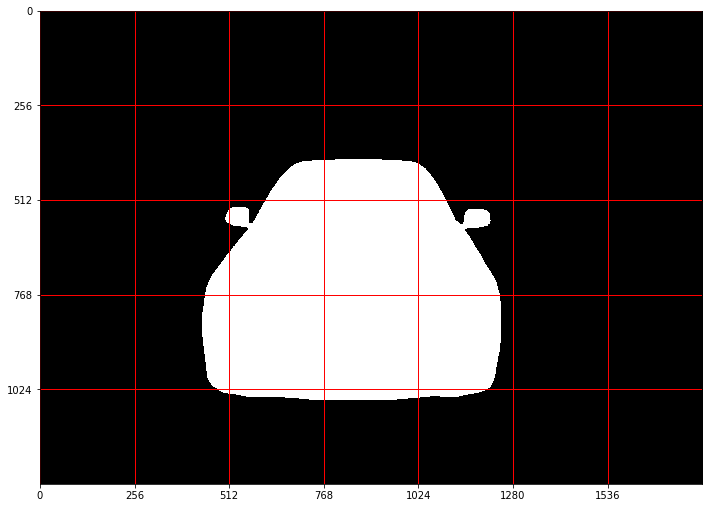

In [21]:
img = masks_cropped[0]
plt.figure(figsize=(10, 10))
io.imshow(img)
plt.xticks(np.arange(0, img.shape[1], wc))
plt.yticks(np.arange(0, img.shape[0], wc))
plt.grid(color = 'r', linewidth = 1)
plt.savefig(car + '_front_mask_cropped_img.png')

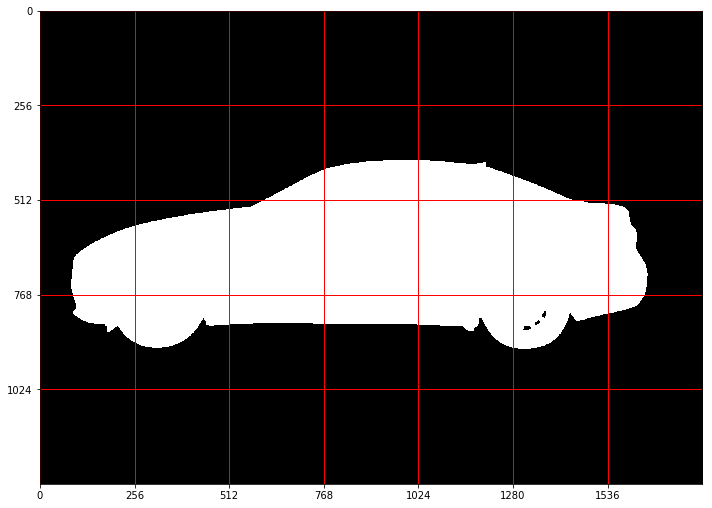

In [22]:
img = masks_cropped[4]
plt.figure(figsize=(10, 10))
io.imshow(img)
plt.xticks(np.arange(0, img.shape[1], wc))
plt.yticks(np.arange(0, img.shape[0], wc))
plt.grid(color = 'r', linewidth = 1)
plt.savefig(car + '_side_mask_cropped_img.png')